In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
power = pd.read_csv('D:\DataTrained Projects\Evaluation Projects\Week 2/global_pp.csv')
power

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Loaded Dataset

In [3]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

We can see that there are lot of null values in the data and also there are columns of datatype 'object'.

In [4]:
print(power.isnull().values.any())
power.isnull().sum()

True


country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

We can confirm that there are lot of null values in the data, so we need to resolve null values issue to proceed further in data processing

In [5]:
print(power['geolocation_source'].unique())
print(power['country_long'].unique())
print(power['year_of_capacity_data'].unique())

['National Renewable Energy Laboratory' 'WRI' nan 'Industry About']
['India']
[  nan 2018.]


In [6]:
power.drop(['country_long'],axis=1,inplace=True)
power.drop(['name'],axis=1,inplace=True)
power.drop(['other_fuel1'],axis=1,inplace=True)
power.drop(['other_fuel2'],axis=1,inplace=True)
power.drop(['other_fuel3'],axis=1,inplace=True)
power.drop(['wepp_id'],axis=1,inplace=True)
power.drop(['estimated_generation_gwh'],axis=1,inplace=True)
power.drop(['owner'],axis=1,inplace=True)
power.drop(['year_of_capacity_data'],axis=1,inplace=True)
power.drop(['gppd_idnr'],axis=1,inplace=True)
power.drop(['country'],axis=1,inplace=True)
power.drop(['generation_data_source'],axis=1,inplace=True)

Dropped columns which are having null values more than 75% in their respective columns.

Dropped columns which are having all same and unique values

In [7]:
power.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,862.000000,862.000000,528.000000,384.000000,401.000000,425.000000,437.000000,443.000000
mean,321.046378,21.196189,77.447848,1996.876894,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.248627,4.907260,17.047817,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,16.771575,74.258975,1988.000000,244.458088,223.650436,174.174750,187.193669,177.643170
50%,60.000000,21.778300,76.719250,2000.000000,797.063475,805.760000,701.027250,716.728350,807.601700
75%,388.125000,25.516375,79.441475,2011.250000,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000
max,4760.000000,34.649000,95.408000,2018.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000


In [8]:
from scipy import stats
print(power['latitude'].mode())
print(power['longitude'].mode())
print(power['commissioning_year'].mode())
print(power['geolocation_source'].mode())
print(power['generation_gwh_2013'].mean())
print(power['generation_gwh_2014'].mean())
print(power['generation_gwh_2015'].mean())
print(power['generation_gwh_2016'].mean())
print(power['generation_gwh_2017'].mean())

0    19.0004
1    24.1917
dtype: float64
0    71.6917
dtype: float64
0    2013.0
dtype: float64
0    WRI
dtype: object
2304.0592017964586
2420.3933164542264
2414.072373401681
2453.9362918708252
2531.7544577527983


In [9]:
power['latitude']=power['latitude'].replace(np.NaN,19.0004)
power['longitude']=power['longitude'].replace(np.NaN,24.1917)
power['commissioning_year']=power['commissioning_year'].replace(np.NaN,2013)
power['geolocation_source']=power['geolocation_source'].replace(np.NaN,"WRI")
power['generation_gwh_2013']=power['generation_gwh_2013'].replace(np.NaN,2304.0592017964586)
power['generation_gwh_2014']=power['generation_gwh_2014'].replace(np.NaN,2420.3933164542264)
power['generation_gwh_2015']=power['generation_gwh_2015'].replace(np.NaN,2414.072373401681)
power['generation_gwh_2016']=power['generation_gwh_2016'].replace(np.NaN,2453.9362918708252)
power['generation_gwh_2017']=power['generation_gwh_2017'].replace(np.NaN,2531.7544577527983)

In [10]:
print(power.isnull().values.any())
power.isnull().sum()

False


capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
url                    0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
dtype: int64

In [11]:
power.shape

(908, 13)

In [12]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    object 
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    object 
 6   url                  908 non-null    object 
 7   geolocation_source   908 non-null    object 
 8   generation_gwh_2013  908 non-null    float64
 9   generation_gwh_2014  908 non-null    float64
 10  generation_gwh_2015  908 non-null    float64
 11  generation_gwh_2016  908 non-null    float64
 12  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), object(4)
memory usage: 92.3+ KB


We will now convert categorical datatype columns using labelencoder

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
power['primary_fuel']=le.fit_transform(power['primary_fuel'])
power['source']=le.fit_transform(power['source'])
power['url']=le.fit_transform(power['url'])
power['geolocation_source']=le.fit_transform(power['geolocation_source'])

In [14]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    int32  
 4   commissioning_year   908 non-null    float64
 5   source               908 non-null    int32  
 6   url                  908 non-null    int32  
 7   geolocation_source   908 non-null    int32  
 8   generation_gwh_2013  908 non-null    float64
 9   generation_gwh_2014  908 non-null    float64
 10  generation_gwh_2015  908 non-null    float64
 11  generation_gwh_2016  908 non-null    float64
 12  generation_gwh_2017  908 non-null    float64
dtypes: float64(9), int32(4)
memory usage: 78.2 KB


In [15]:
corr_mat = power.corr()
corr_mat

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.000000,0.057801,0.170443,-0.377783,0.012518,-2.417009e-01,-2.431764e-01,2.046977e-01,6.678419e-01,7.054341e-01,7.220814e-01,7.528288e-01,7.670398e-01
latitude,0.057801,1.000000,0.084909,-0.023407,0.035378,6.172820e-02,-1.370873e-01,-1.906055e-01,3.862917e-02,4.599225e-02,3.842805e-02,3.343631e-02,3.389180e-02
longitude,0.170443,0.084909,1.000000,-0.249316,-0.048017,-2.059034e-02,-1.954206e-01,1.134769e-02,2.999106e-02,2.840970e-02,3.557388e-02,4.556108e-02,5.439461e-02
primary_fuel,-0.377783,-0.023407,-0.249316,1.000000,0.145487,5.360860e-02,5.893477e-01,-4.828029e-01,-1.205116e-01,-1.249997e-01,-1.251376e-01,-1.313584e-01,-1.321741e-01
commissioning_year,0.012518,0.035378,-0.048017,0.145487,1.000000,3.016596e-01,3.191631e-01,-2.424386e-01,9.453018e-02,1.145342e-01,1.273249e-01,1.472747e-01,1.478741e-01
source,-0.241701,0.061728,-0.020590,0.053609,0.301660,1.000000e+00,1.603791e-01,-5.058227e-01,1.148485e-16,1.129442e-17,3.266585e-17,2.296820e-17,-1.191072e-16
url,-0.243176,-0.137087,-0.195421,0.589348,0.319163,1.603791e-01,1.000000e+00,-1.914978e-02,-1.030115e-17,4.521930e-17,-3.085652e-17,-6.067859e-17,-1.187921e-16
geolocation_source,0.204698,-0.190605,0.011348,-0.482803,-0.242439,-5.058227e-01,-1.914978e-02,1.000000e+00,-4.314899e-17,-1.111170e-16,-1.004804e-17,1.807415e-16,9.412254e-17
generation_gwh_2013,0.667842,0.038629,0.029991,-0.120512,0.094530,1.148485e-16,-1.030115e-17,-4.314899e-17,1.000000e+00,9.634535e-01,8.963761e-01,8.735420e-01,8.306385e-01
generation_gwh_2014,0.705434,0.045992,0.028410,-0.125000,0.114534,1.129442e-17,4.521930e-17,-1.111170e-16,9.634535e-01,1.000000e+00,9.537116e-01,9.260100e-01,8.918721e-01


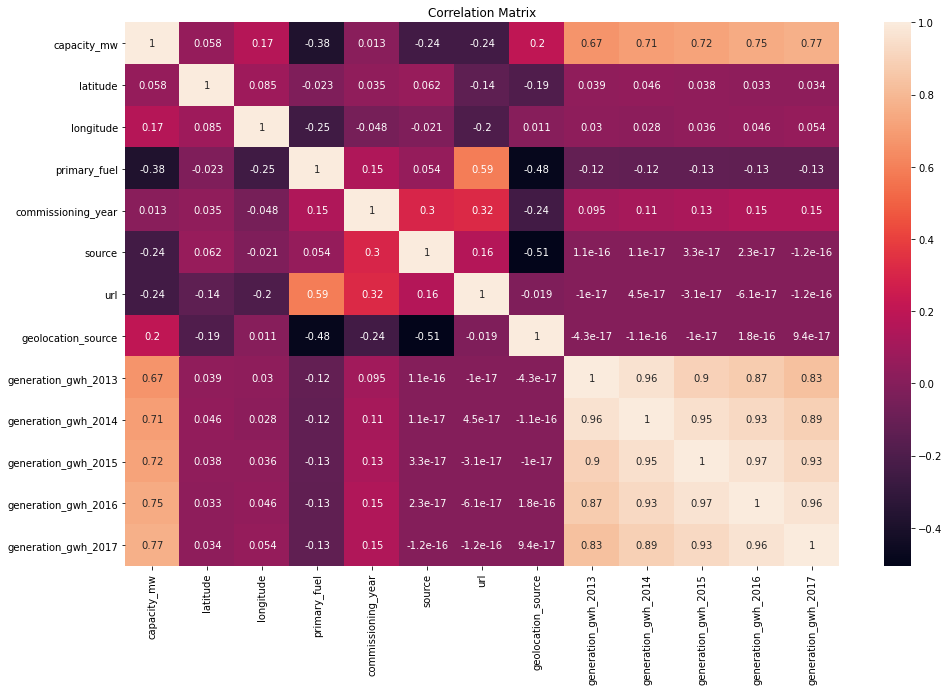

In [16]:
plt.figure(figsize=[16,10])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [17]:
corr_target = power.corrwith(power['primary_fuel'], axis=0)
corr_target

capacity_mw           -0.377783
latitude              -0.023407
longitude             -0.249316
primary_fuel           1.000000
commissioning_year     0.145487
source                 0.053609
url                    0.589348
geolocation_source    -0.482803
generation_gwh_2013   -0.120512
generation_gwh_2014   -0.125000
generation_gwh_2015   -0.125138
generation_gwh_2016   -0.131358
generation_gwh_2017   -0.132174
dtype: float64

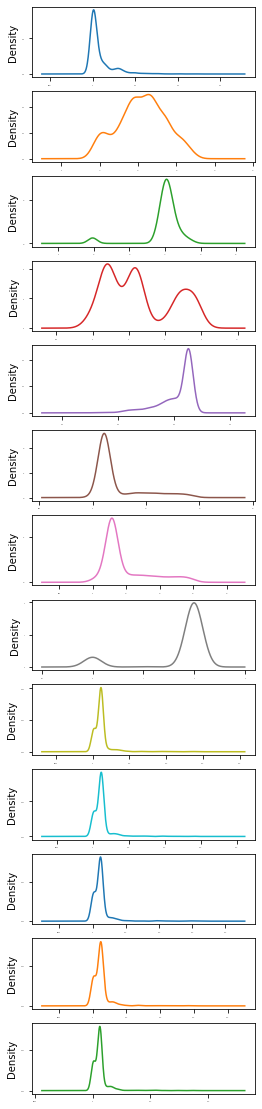

In [56]:
power.plot(kind='density',subplots=True, sharex=False, legend=False, fontsize=1, figsize=[4,20])
plt.show()

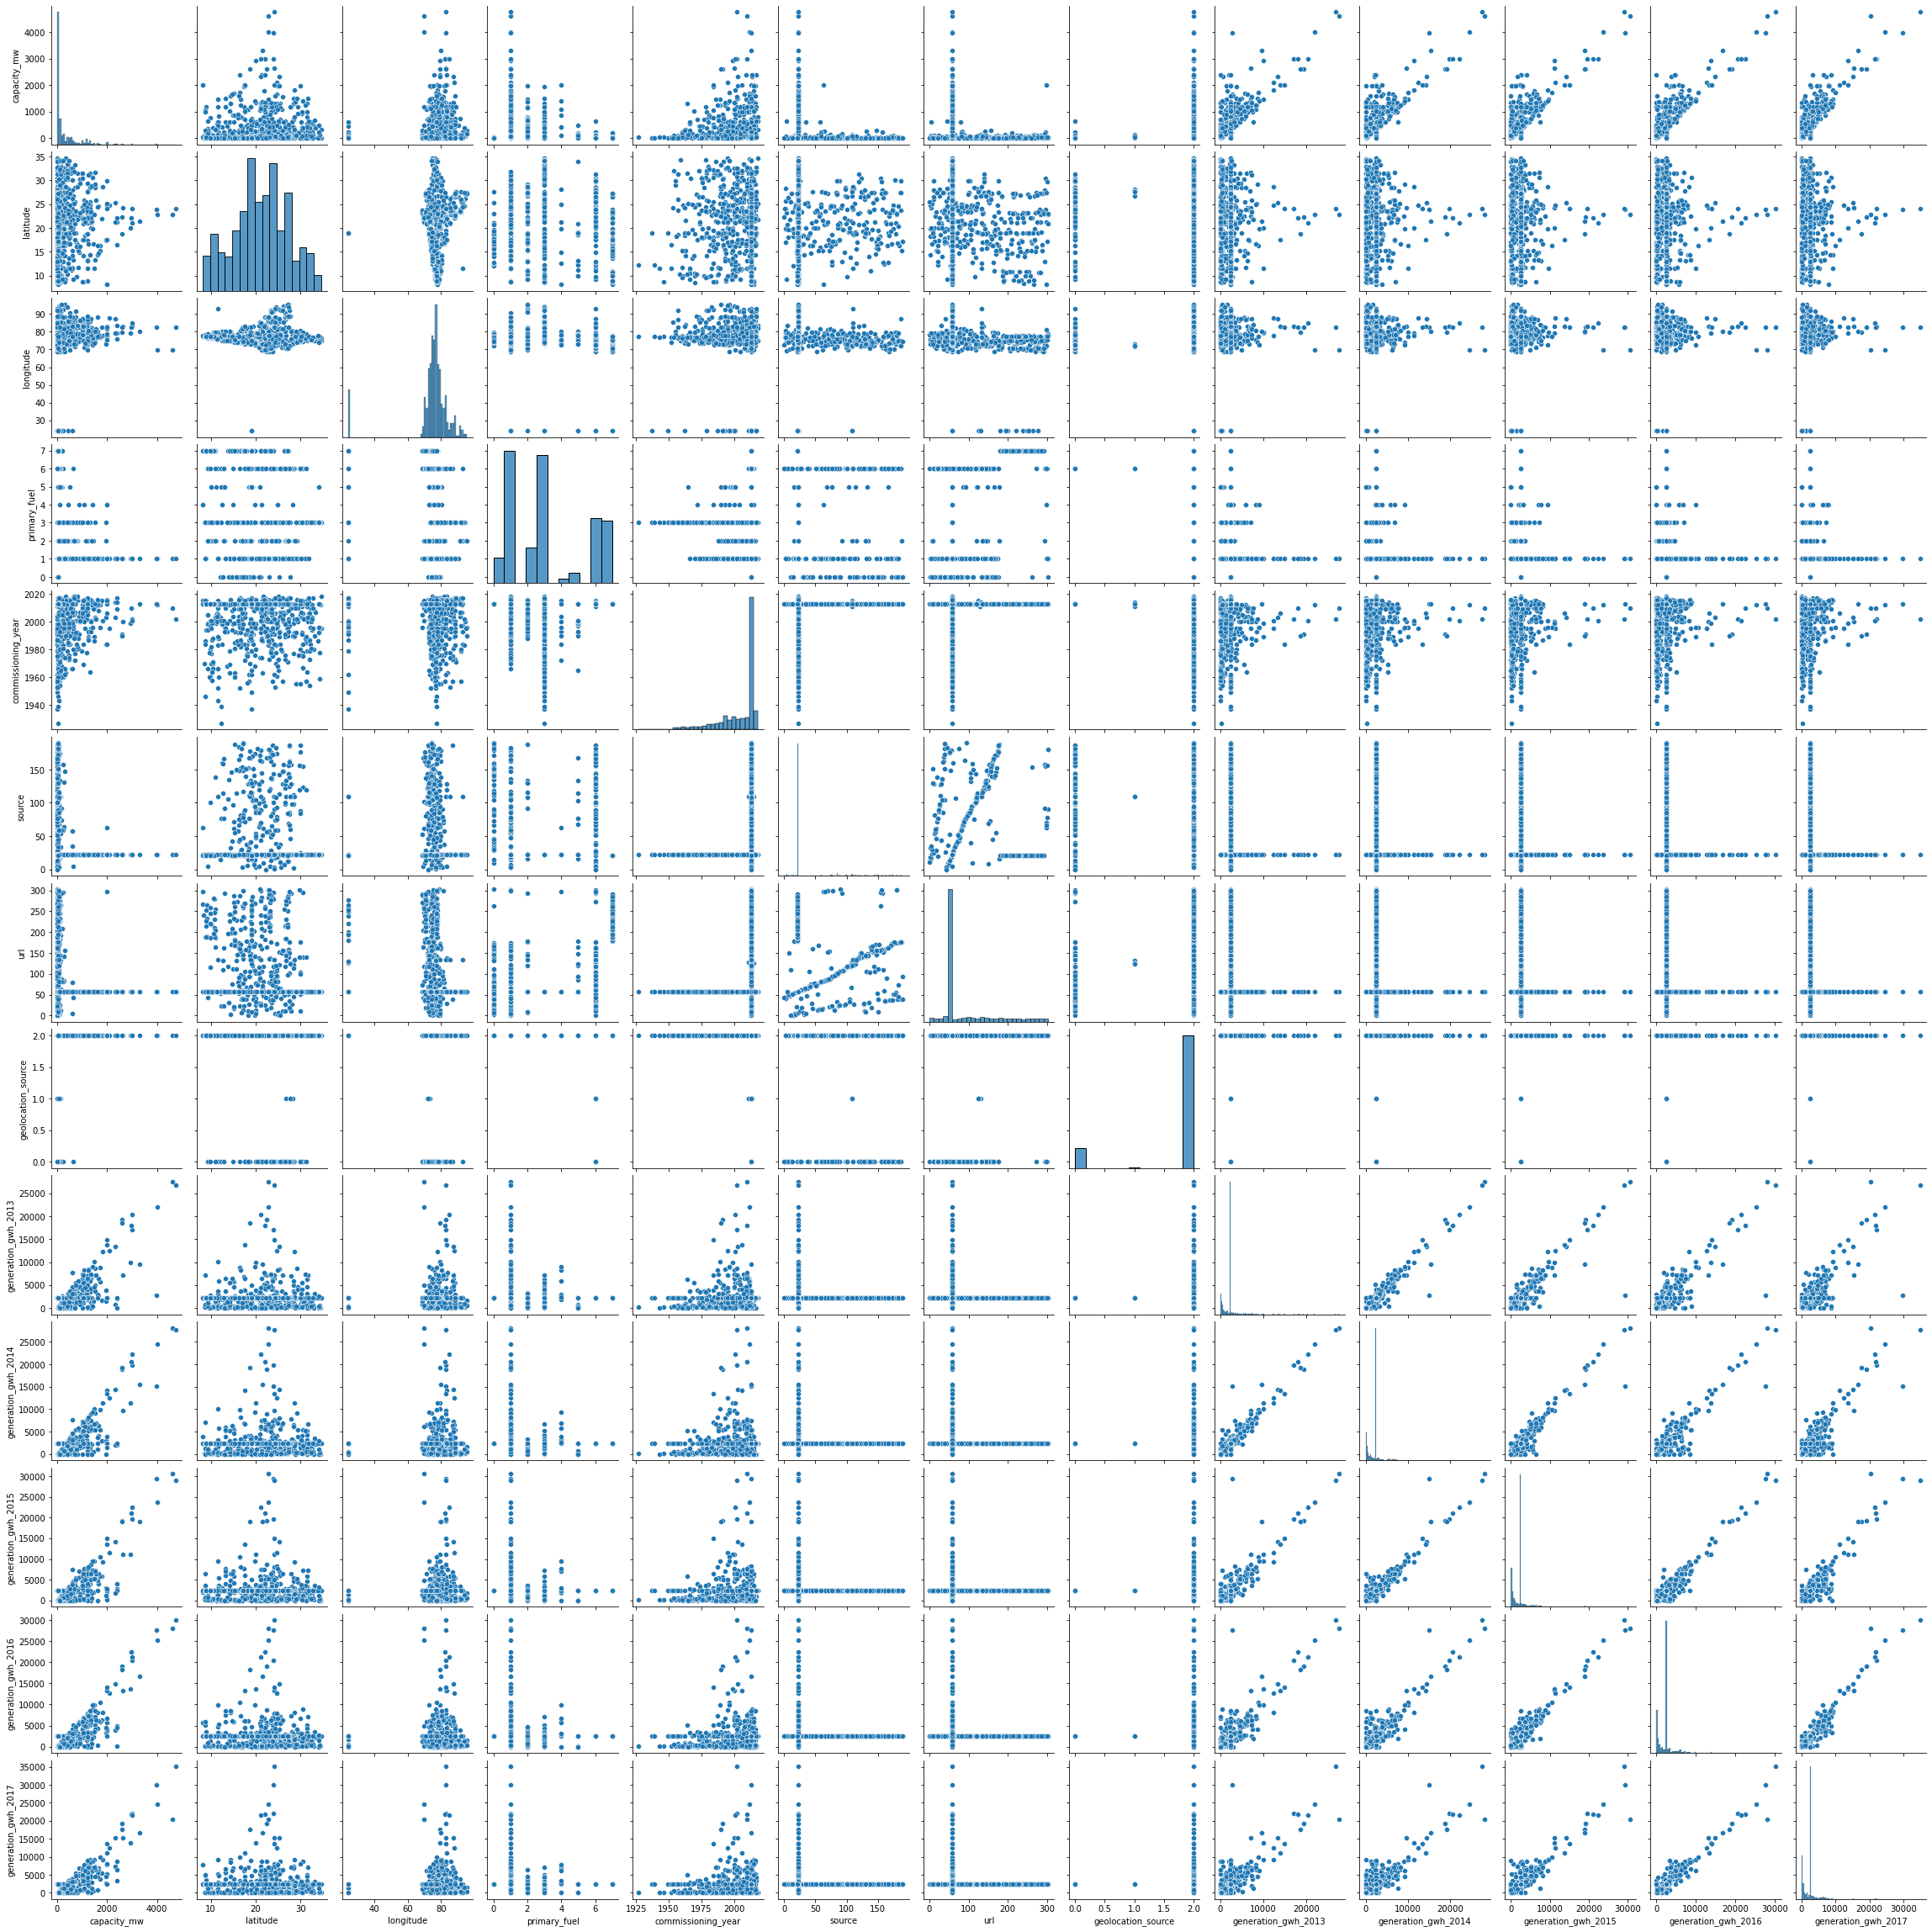

In [57]:
sns.pairplot(power)
plt.show()

Density plot and pairplot tell us that there is some skewness in few parts of data, so we use power transform to remove skewness to some extent

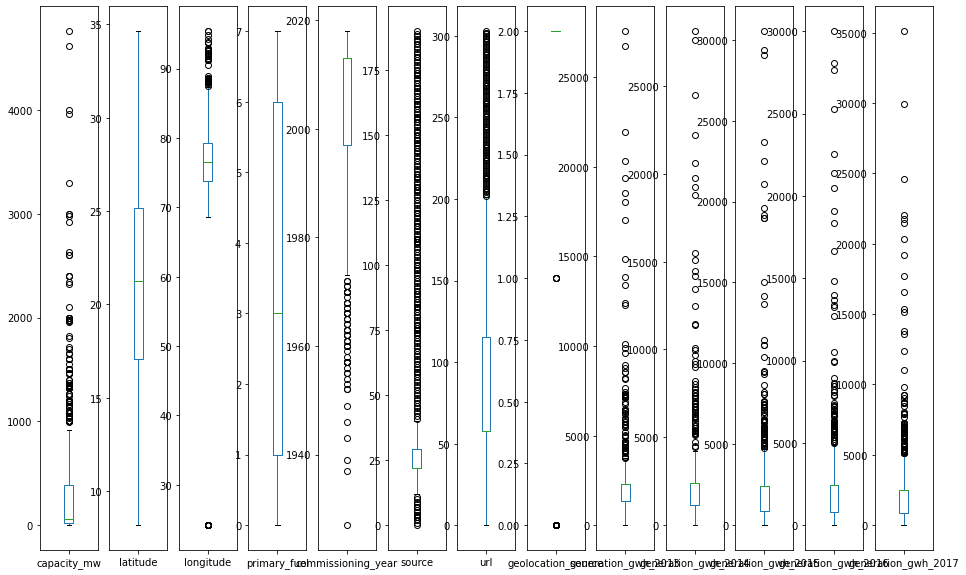

In [59]:
power.plot(kind='box',subplots=True,figsize=[16,10])
plt.show()

There are only few outliers present in the dataset, which can be considered

In [18]:
x=power.drop('primary_fuel',axis=1)
y=power['primary_fuel']

In [19]:
x.skew()

capacity_mw            3.193257
latitude              -0.093609
longitude             -3.100724
commissioning_year    -1.779021
source                 1.829145
url                    1.512258
geolocation_source    -2.161710
generation_gwh_2013    5.241491
generation_gwh_2014    5.041961
generation_gwh_2015    5.367370
generation_gwh_2016    5.071758
generation_gwh_2017    5.111938
dtype: float64

In [20]:
from sklearn.preprocessing import power_transform
power_new = power_transform(x)
power_new = pd.DataFrame(power_new,columns = x.columns)
power_new.skew()

capacity_mw            0.020461
latitude              -0.070045
longitude              0.051138
commissioning_year    -1.139154
source                -0.214850
url                    0.064612
geolocation_source    -2.134586
generation_gwh_2013    0.180340
generation_gwh_2014    0.124543
generation_gwh_2015    0.070937
generation_gwh_2016    0.038668
generation_gwh_2017    0.013392
dtype: float64

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=15)

In [25]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test, y_pred)

0.7250618462205118

In [26]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=10,random_state = 0 )
RFR.fit(x_train, y_train)
y_pred=RFR.predict(x_test)
r2_score(y_test, y_pred)

0.8794201752072895

In [27]:
from sklearn.svm import SVR

SVR_Reg = SVR(kernel = "rbf",degree=3, C=40)
SVR_Reg.fit(x_train, y_train)
y_pred = SVR_Reg.predict(x_test)
r2_score(y_test, y_pred)

0.41321475412291375

In [28]:
from sklearn.tree import DecisionTreeRegressor
RTD = DecisionTreeRegressor(random_state = 0)
RTD.fit(x_train, y_train)
y_pred = RTD.predict(x_test)
r2_score(y_test, y_pred)

0.8038000644575313

In [29]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(reg, x, y, cv=6)
print('Cross validation score of Linear Regression : ',scr.mean())

Cross validation score of Linear Regression :  0.7159556654957974


In [30]:
scr=cross_val_score(RFR, x, y, cv=6)
print('Cross validation score of RFR : ',scr.mean())

Cross validation score of RFR :  0.8971258068007768


In [31]:
scr=cross_val_score(SVR_Reg, x, y, cv=6)
print('Cross validation score of SVR : ',scr.mean())

Cross validation score of SVR :  0.36333099728203927


In [32]:
scr=cross_val_score(RTD, x, y, cv=6)
print('Cross validation score of RTD : ',scr.mean())

Cross validation score of RTD :  0.829165568900036


From all the above models we can find that the difference between cross validation and Linear Regression model is minimum,

so Linear Regression Model with 72.5% r2 score is the best model

In [34]:
import joblib
joblib.dump(reg,'Global_Power_Plant.pkl')

['Global_Power_Plant.pkl']